In [13]:
# Représentation des séries temporelles
import pandas as pd
import matplotlib.pyplot as plt
df= pd.read_csv("AirPassengers.csv", index_col=0, parse_dates=True)
df.head()

,Airpass
t,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


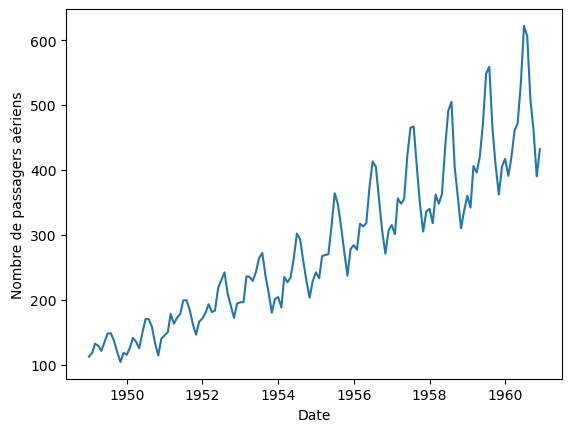

In [16]:
# Représentation graphique
plt.xlabel('Date')
plt.ylabel('Nombre de passagers aériens')
plt.plot(df)

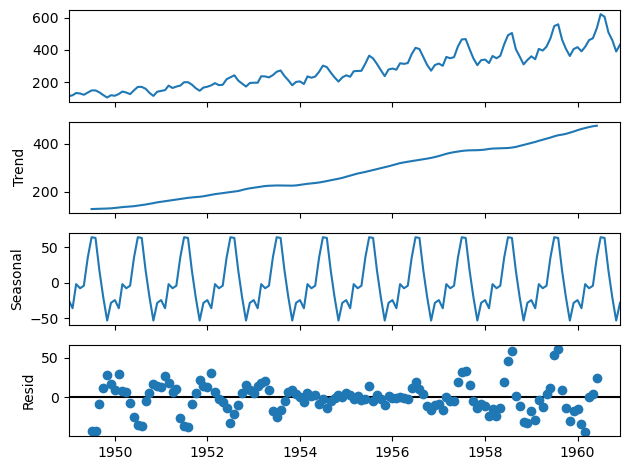

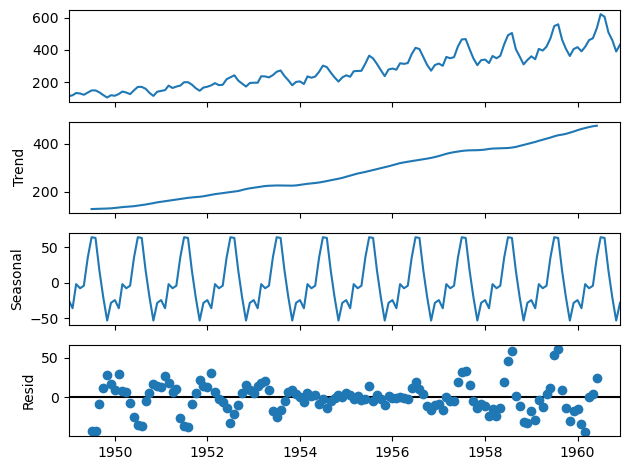

In [19]:
# Décomposition de la série temporelle
from statsmodels.tsa.seasonal import seasonal_decompose
TSA=seasonal_decompose(df)
TSA.plot()

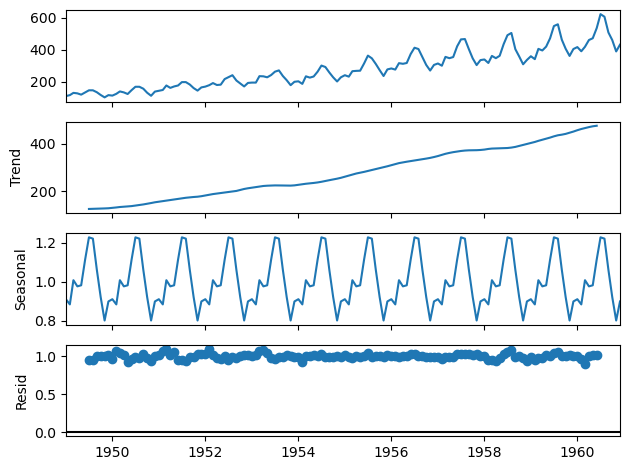

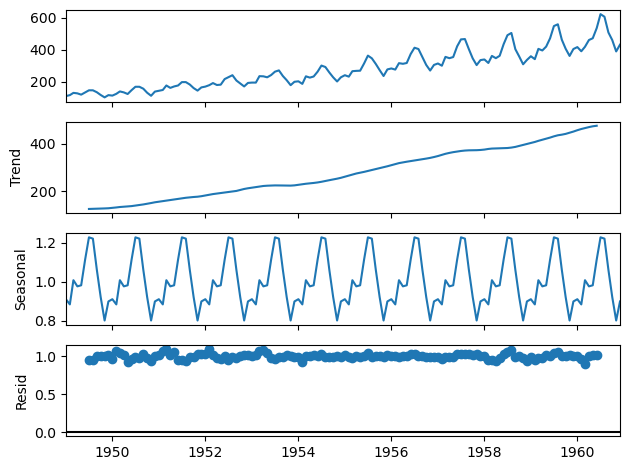

In [21]:
#Est ce qu’ un modèle multiplicatif ?
from statsmodels.tsa.seasonal import seasonal_decompose
TSA=seasonal_decompose(df, model='multiplicative')
TSA.plot()

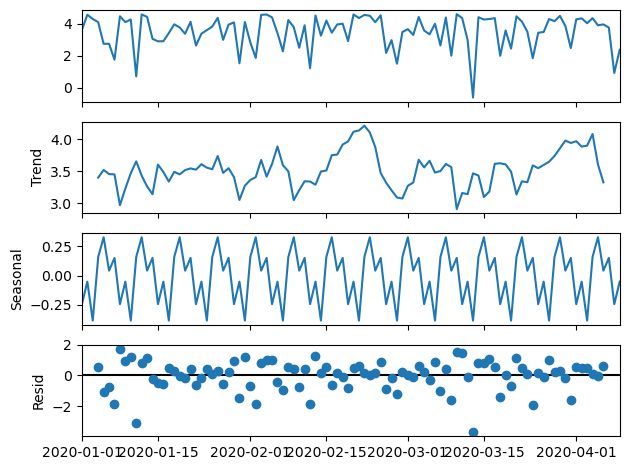

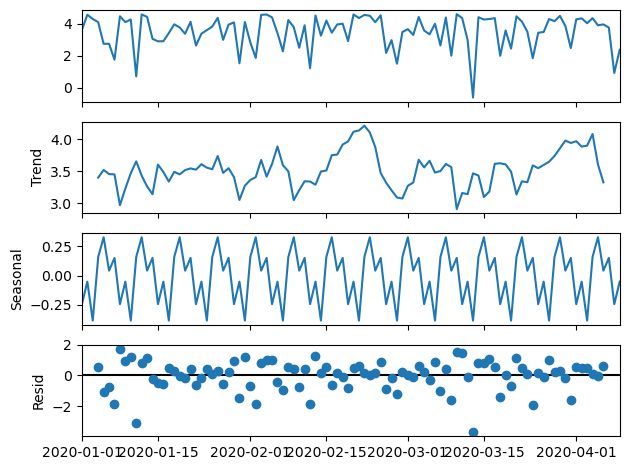

In [36]:
import numpy as np
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose

# Exemple de DataFrame
np.random.seed(42)
date_rng = pd.date_range(start='1/1/2020', periods=100, freq='D')
df = pd.DataFrame({'value': np.random.rand(100) * 100}, index=date_rng)

# Transformation logarithmique
df_log = np.log(df)

# Décomposition
TSA = seasonal_decompose(df_log, model='additive')  
TSA.plot()


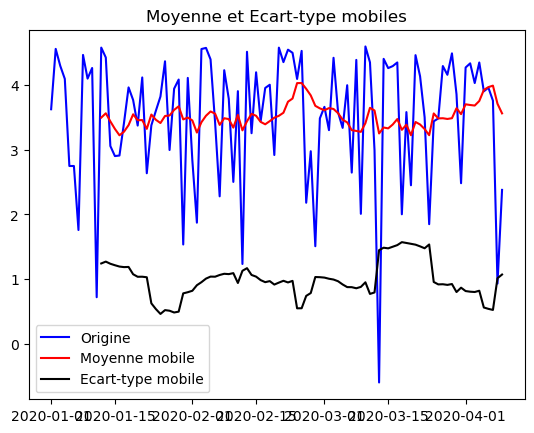

In [38]:
# La série est-elle stationnaire ?     
plt.figure(2)
rolling_mean = df_log.rolling(12).mean()
rolling_std = df_log.rolling(12).std()
plt.plot(df_log, color = 'blue', label = 'Origine')
plt.plot(rolling_mean, color = 'red', label = 'Moyenne mobile')
plt.plot(rolling_std, color = 'black', label = 'Ecart-type mobile')
plt.legend(loc = 'best')
plt.title('Moyenne et Ecart-type mobiles')
plt.show()

In [40]:
from statsmodels.tsa.stattools import adfuller
result=adfuller(df_log.values)
print('ADF Statistic: %f' % result[0])
print('La p-value est de: %f' % result[1])

ADF Statistic: -10.316826
La p-value est de: 0.000000


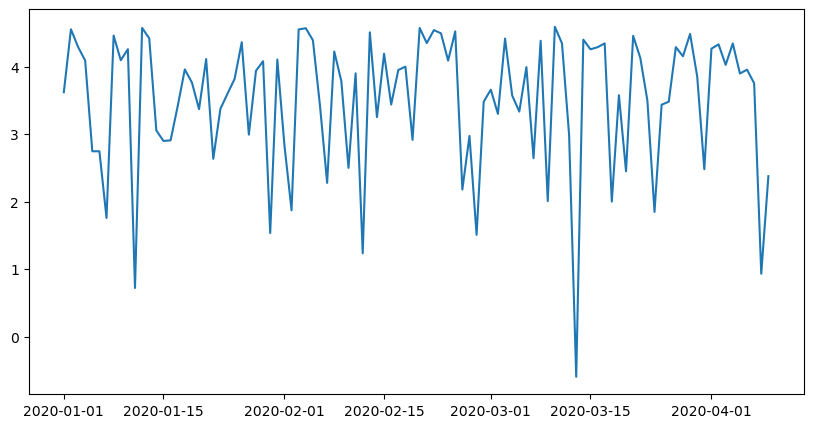

In [42]:
plt.figure(figsize=(10,5))
plt.plot(df_log);

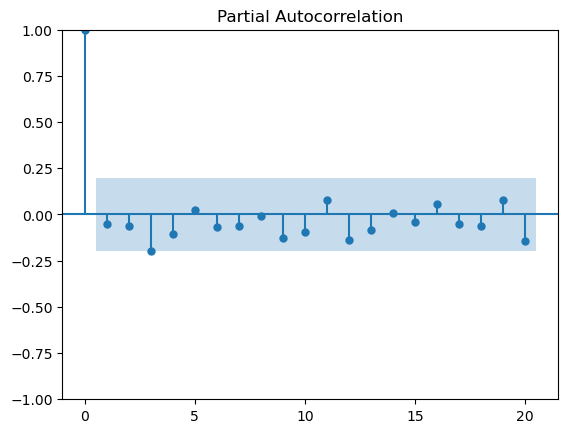

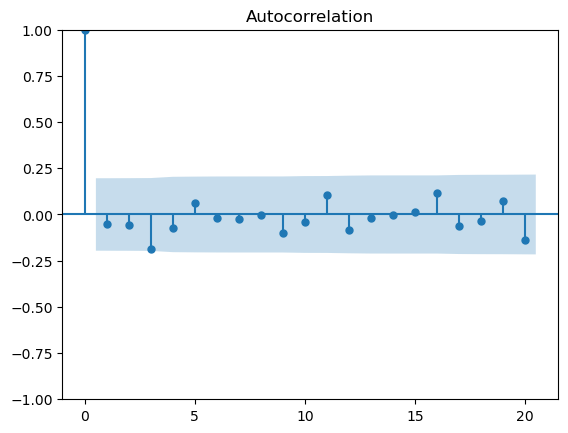

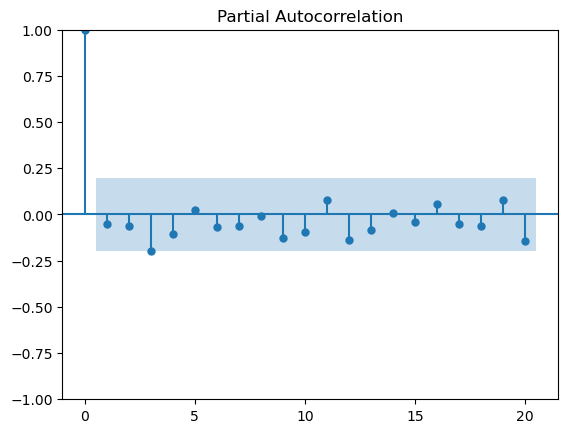

In [44]:
# Méthode Box-Jenkins

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_acf(df_log)
plot_pacf(df_log)

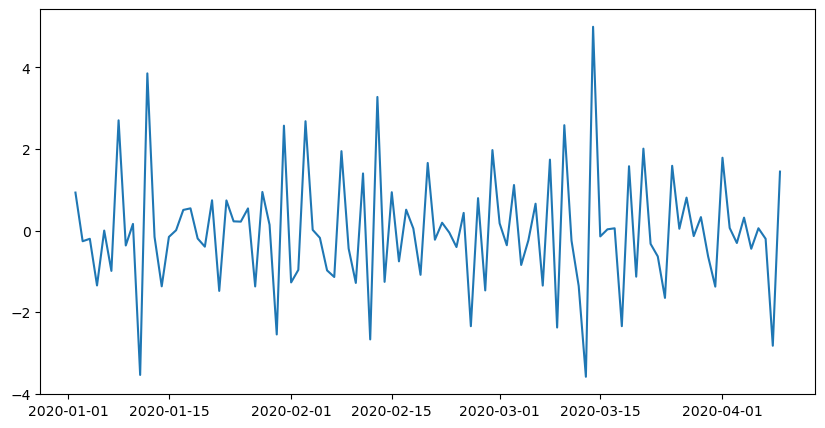

In [46]:
# Stationnarité de la série
# Différenciation d’ordre 1 + ACF/PACF 
plt.figure(figsize=(10,5))
plt.plot(df_log.diff());

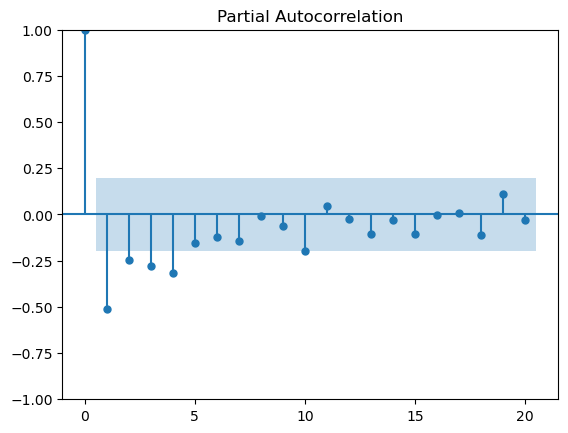

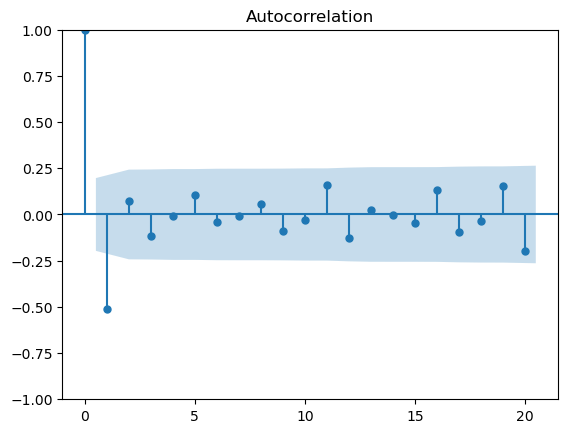

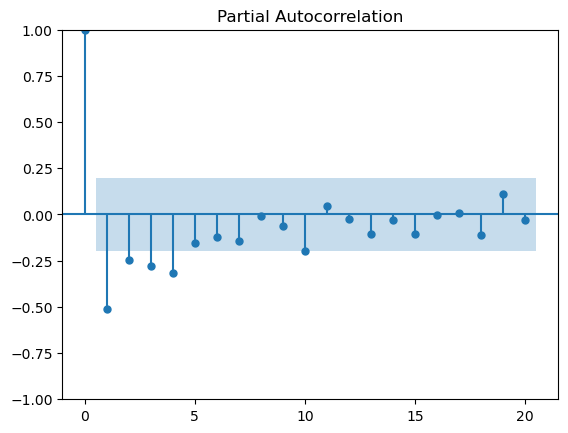

In [48]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_acf(df_log.diff().dropna())
plot_pacf(df_log.diff().dropna())

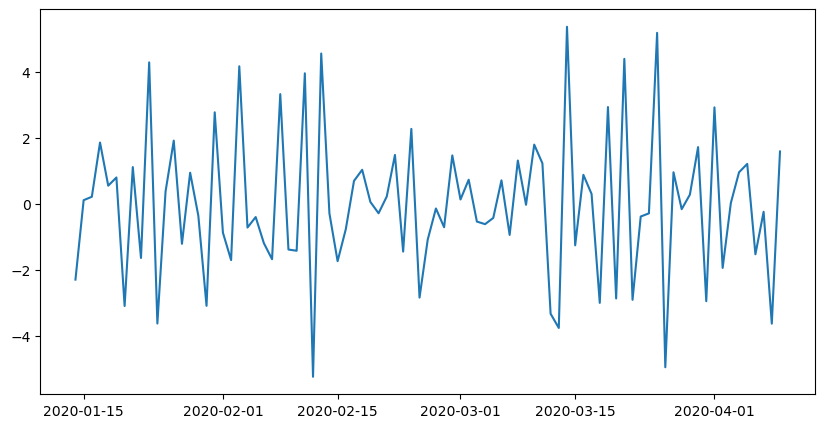

In [50]:
# Différenciation d’ordre 2 + ACF/PACF
plt.figure(figsize=(10,5))
plt.plot(df_log.diff().diff(12));

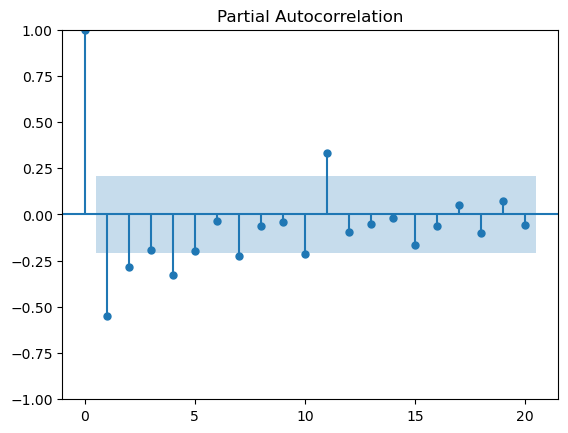

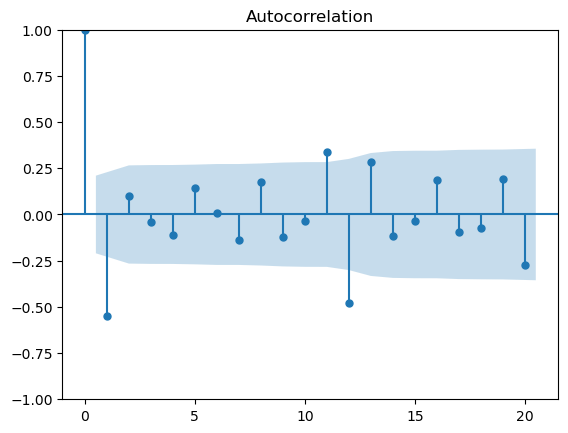

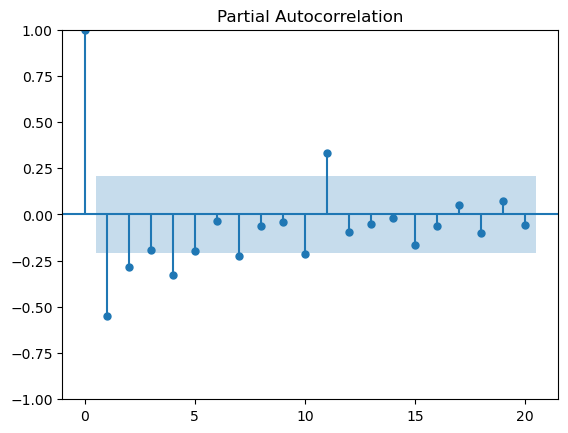

In [52]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(df_log.diff().diff(12).dropna())
plot_pacf(df_log.diff().diff(12).dropna())

C:\Users\elidrissi\AppData\Local\Temp\ipykernel_9152\3312959662.py:14: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ax1.plot(pd.date_range(df_log.index[len(df_log)-1], periods=60, freq='M'), y_pred, label='Pred')
C:\Users\elidrissi\AppData\Local\Temp\ipykernel_9152\3312959662.py:17: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ax2.plot(pd.date_range(df_log.index[len(df_log)-1], periods=60, freq='M'), x_pred, label='Pred')


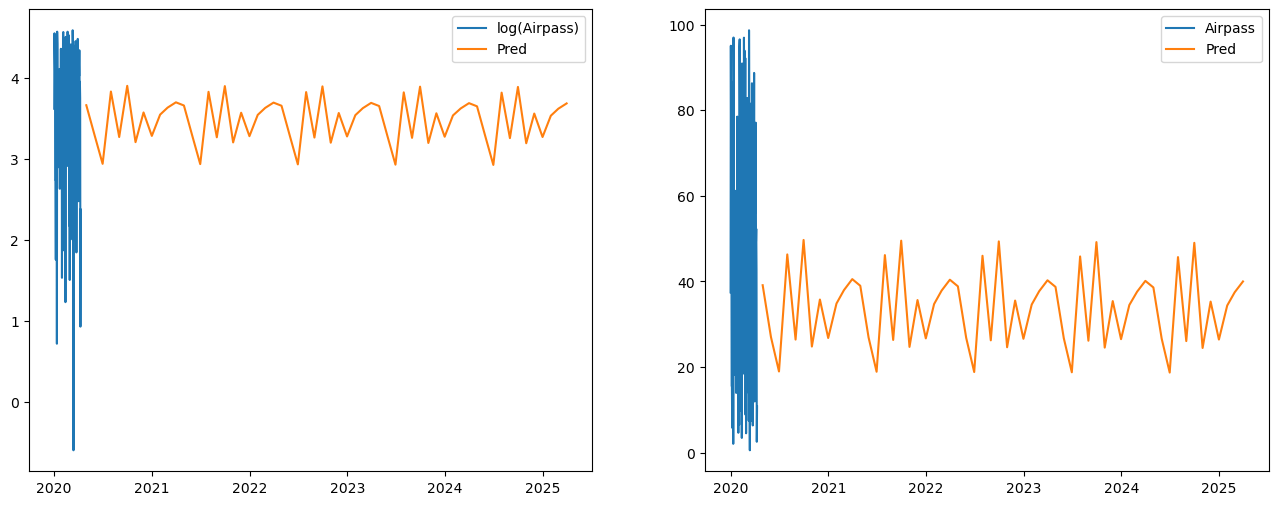

In [54]:
# Prévision avec un lissage exponentiel

import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.api import ExponentialSmoothing
let = ExponentialSmoothing(df_log.values, seasonal_periods=12, trend='add', seasonal='add').fit()

y_pred = let.forecast(60)# prédiction pour la série log
x_pred = np.exp(let.forecast(60)) # récupération des prédiction pour la série originale

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,6))

ax1.plot(df_log, label='log(Airpass)')
ax1.plot(pd.date_range(df_log.index[len(df_log)-1], periods=60, freq='M'), y_pred, label='Pred')
ax1.legend()
ax2.plot(df, label='Airpass')
ax2.plot(pd.date_range(df_log.index[len(df_log)-1], periods=60, freq='M'), x_pred, label='Pred')
ax2.legend()
plt.show()